In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset=pd.read_csv("House-Price.csv")

In [3]:
dataset.head(3)

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,condition_of_the_house,Area_of_the_house,Area_of_the_basement,Built_Year,Renovation_Year,Number_of_schools_nearby,Distance_from_the_airport,Price
0,5,3,3650,9050,2,5,3370,280,1921,0,2,58,2380000
1,4,3,2920,4000,2,5,1910,1010,1909,0,2,51,1400000
2,5,3,2910,9480,2,3,2910,0,1939,0,1,53,1200000


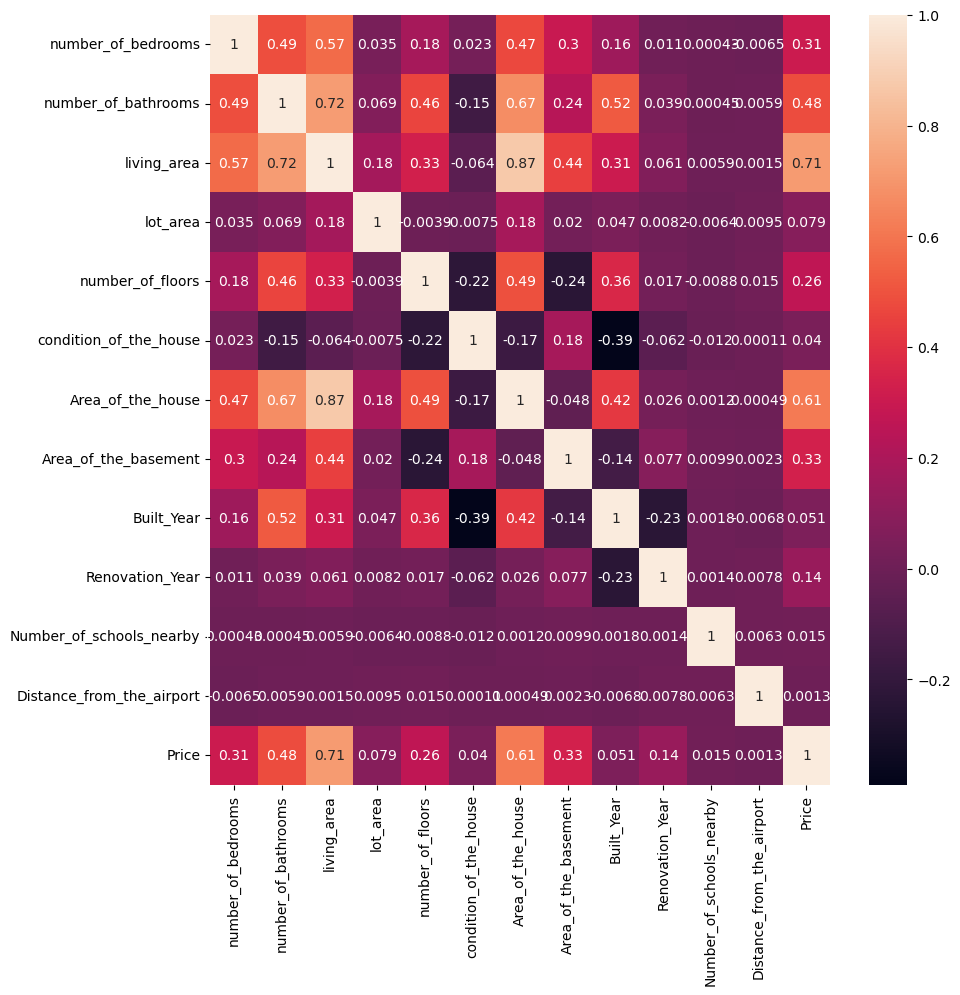

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [7]:
x= dataset.iloc[:,:-1]

In [9]:
y=dataset["Price"]

In [14]:
sc= StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np


# LinearRegression

In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

56.87637852243075

In [51]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

54864489001.22952
160121.946604706
234231.69939448743


In [28]:
(x.columns)

RangeIndex(start=0, stop=12, step=1)

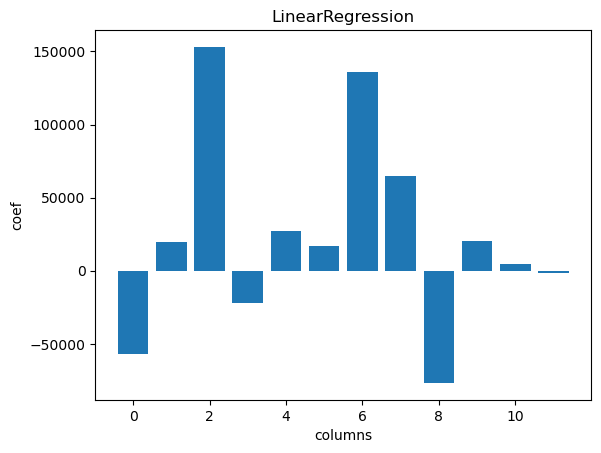

In [30]:
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Lasso

In [38]:
la= Lasso(alpha=10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.264e+12, tolerance: 1.321e+11
  model = cd_fast.enet_coordinate_descent(


56.877044238168075

In [52]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

54863642037.25717
160117.95212782556
234229.8914256188


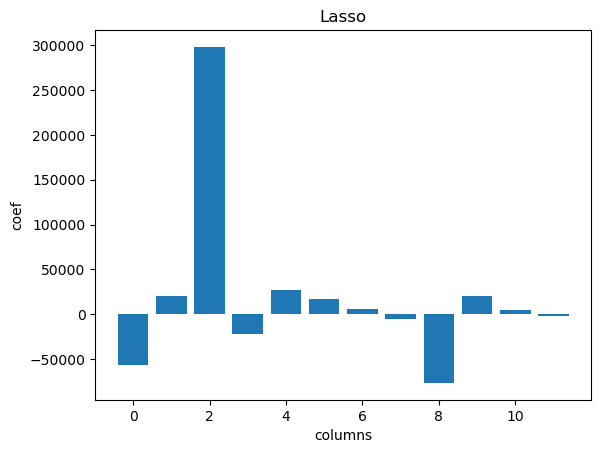

In [39]:
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

#Ridge

# Ridge

In [40]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

56.88018232936914

In [53]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

54859649567.137856
160082.42714112945
234221.36872441391


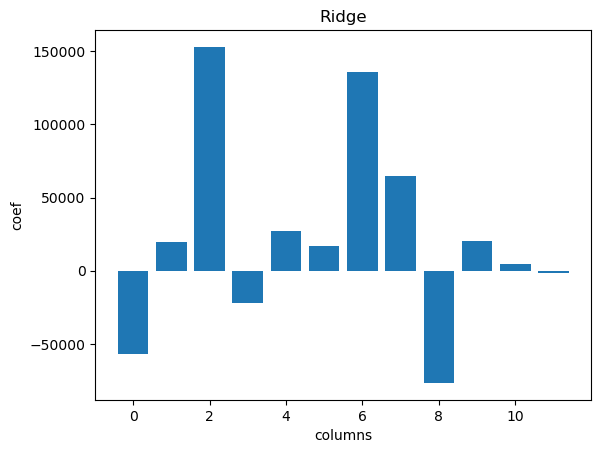

In [41]:
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [55]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [56]:
df

,col_name,LinearRegression,Lasso,Ridge
0,0,-56889.696324,-56867.017885,-56677.247169
1,1,19741.119220,19709.999500,19829.268728
2,2,153130.442896,298128.903989,152925.671943
3,3,-21845.587321,-21830.524402,-21762.421968
4,4,27071.543065,27073.283085,27063.701986
5,5,16943.058453,16931.247956,16956.378866
6,6,135673.879373,5420.394801,135476.130913
7,7,64478.104438,-5819.709225,64422.112552
8,8,-76758.756807,-76734.244280,-76607.521387
9,9,20424.083528,20419.477255,20456.710456
